In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [74]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': 'black',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'medium',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

In [3]:
df = pd.read_csv("unhcr_Syria_refugeesCLEAN.csv", na_values=["*"])
df.head(10)

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
0,2011,United Arab Emirates,Syrian Arab Rep.,37.0,6.0,NaN,NaN,NaN,NaN,NaN,43.0
1,2011,Armenia,Syrian Arab Rep.,6.0,2.0,NaN,NaN,NaN,NaN,NaN,8.0
2,2011,Australia,Syrian Arab Rep.,84.0,66.0,NaN,NaN,NaN,NaN,NaN,150.0
3,2011,Austria,Syrian Arab Rep.,903.0,456.0,NaN,NaN,NaN,NaN,NaN,1359.0
4,2011,Azerbaijan,Syrian Arab Rep.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2011,Belgium,Syrian Arab Rep.,312.0,666.0,NaN,NaN,NaN,NaN,NaN,978.0
6,2011,Benin,Syrian Arab Rep.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2011,Bulgaria,Syrian Arab Rep.,98.0,70.0,NaN,NaN,NaN,NaN,NaN,168.0
8,2011,Bahrain,Syrian Arab Rep.,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0
9,2011,Bosnia and Herzegovina,Syrian Arab Rep.,1.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0


In [4]:
df.shape

(806, 11)

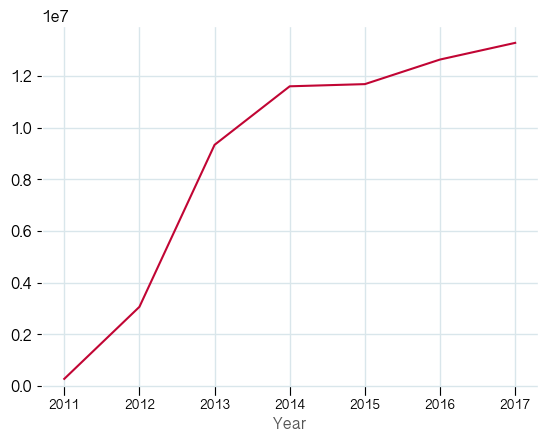

In [55]:
# df.groupby(['pclass','gender'])['survived'].count()
# df.groupby(['Year', 'Host_Country'])['Total_Population'].count()
# df.groupby(['Year'])['Total_Population'].sum()
df.groupby(['Year'])['Total_Population'].sum().plot()

In [32]:
# SORT BY RETURNED TO SEE HOW IT AFFECTS TOTAL
# df.sort_values(by='Returned_IDPs', ascending=False)
# df[df['Host_Country'].str.contains('Syrian')]

In [6]:
df.Total_Population.isnull().value_counts()
df.dtypes

Year                                     int64
Host_Country                            object
Origin                                  object
Refugees                               float64
Asylum-seekers                         float64
Returned refugees                      float64
Internally_Displaced_Persons_(IDPs)    float64
Returned_IDPs                          float64
Stateless persons                      float64
Others_of_concern                      float64
Total_Population                       float64
dtype: object

In [56]:
df['Host_Country'] = df.Host_Country.str.replace("United States of America", "United States")

In [79]:
# df[df.Host_Country == 'Algeria']
us_df = df[df.Host_Country == 'United States']
us_df.sort_values(by='Year', ascending=False)

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
800,2017,United States,Syrian Arab Rep.,7282.0,3358.0,NaN,NaN,NaN,NaN,NaN,10640.0
665,2016,United States,Syrian Arab Rep.,6444.0,3364.0,NaN,NaN,NaN,NaN,NaN,9808.0
535,2015,United States,Syrian Arab Rep.,5651.0,3118.0,NaN,NaN,NaN,NaN,NaN,8769.0
406,2014,United States,Syrian Arab Rep.,4750.0,2302.0,NaN,NaN,NaN,NaN,NaN,7052.0
282,2013,United States,Syrian Arab Rep.,3802.0,1378.0,NaN,NaN,NaN,NaN,NaN,5180.0
168,2012,United States,Syrian Arab Rep.,1425.0,367.0,NaN,NaN,NaN,NaN,NaN,1792.0
72,2011,United States,Syrian Arab Rep.,373.0,112.0,NaN,NaN,NaN,NaN,NaN,485.0


In [54]:
us_df.Total_Population.sum()

43726.0

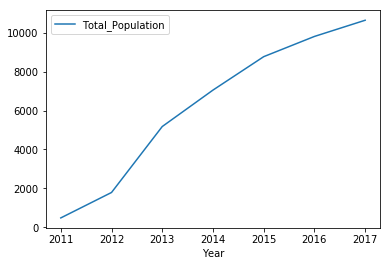

In [56]:
us_df.plot(x='Year', y='Total_Population')

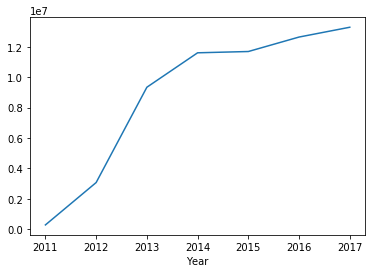

In [30]:
# df.groupby('Host_Country').Total_Population.sum()
df.groupby('Year').Total_Population.sum().plot()

In [59]:
# US ranks 22 when expand to top 30, by my count on the df
last_year = df[(df.Year == 2017) & (df.Host_Country != 'Syrian Arab Rep.')]
top_ten = last_year.sort_values(by='Total_Population', ascending=False).head(10)
top_ten

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
796,2017,Turkey,Syrian Arab Rep.,3424237.0,163.0,NaN,NaN,NaN,NaN,NaN,3424400.0
742,2017,Lebanon,Syrian Arab Rep.,992127.0,8.0,NaN,NaN,NaN,NaN,2248.0,994383.0
734,2017,Jordan,Syrian Arab Rep.,653031.0,NaN,NaN,NaN,NaN,NaN,NaN,653031.0
704,2017,Germany,Syrian Arab Rep.,496674.0,70833.0,NaN,NaN,NaN,NaN,NaN,567507.0
729,2017,Iraq,Syrian Arab Rep.,247057.0,NaN,NaN,NaN,NaN,NaN,NaN,247057.0
710,2017,Egypt,Syrian Arab Rep.,126688.0,NaN,NaN,NaN,NaN,NaN,NaN,126688.0
789,2017,Sweden,Syrian Arab Rep.,103614.0,3531.0,NaN,NaN,NaN,NaN,NaN,107145.0
678,2017,Austria,Syrian Arab Rep.,43888.0,3937.0,NaN,NaN,NaN,NaN,NaN,47825.0
765,2017,Netherlands,Syrian Arab Rep.,30851.0,668.0,NaN,NaN,NaN,NaN,NaN,31519.0
721,2017,Greece,Syrian Arab Rep.,13714.0,9605.0,NaN,NaN,NaN,NaN,NaN,23319.0


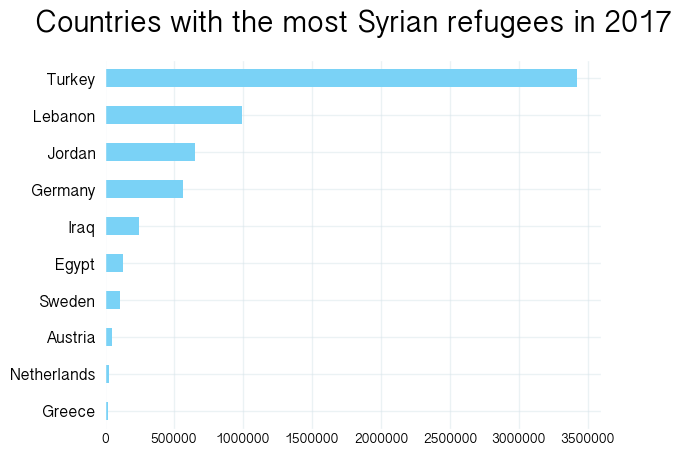

In [34]:
# top_ten.plot(kind='barh', x='Host_Country', y='Total_Population')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][4]
ax = top_ten.sort_values(by='Total_Population', ascending=True).plot(kind='barh', x='Host_Country', y='Total_Population', color=color)

ax.set_title("Countries with the most Syrian refugees in 2017", fontweight='bold', pad=20)
ax.title.set_fontsize(22)
ax.title.set_fontname("Khmer Sangam MN")

ax.legend_.remove()
ax.yaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

# plt.savefig("gained_pop.pdf", transparent=True)

In [36]:
df2 = pd.read_csv("GDP_CLEANED.csv", encoding="latin-1")

In [37]:
df2.head()

,Unnamed: 0,code,rank,blank,country,gdp,blank2,blank3
0,USA,1,NaN,United States,"19,390,604",NaN,NaN,NaN
1,CHN,2,NaN,China,"12,237,700",NaN,NaN,NaN
2,JPN,3,NaN,Japan,"4,872,137",NaN,NaN,NaN
3,DEU,4,NaN,Germany,"3,677,439",NaN,NaN,NaN
4,GBR,5,NaN,United Kingdom,"2,622,434",NaN,NaN,NaN


In [38]:
# everywhere.drop(columns = [])
# df2.drop(columns = ['rank', 'gdp', 'blank2', 'blank3'], inplace=True)
df2.head()

,Unnamed: 0,code,rank,blank,country,gdp,blank2,blank3
0,USA,1,NaN,United States,"19,390,604",NaN,NaN,NaN
1,CHN,2,NaN,China,"12,237,700",NaN,NaN,NaN
2,JPN,3,NaN,Japan,"4,872,137",NaN,NaN,NaN
3,DEU,4,NaN,Germany,"3,677,439",NaN,NaN,NaN
4,GBR,5,NaN,United Kingdom,"2,622,434",NaN,NaN,NaN


In [98]:
df2.rename(index=str, columns={"Unnamed: 0": "country_code"}, inplace=True)

In [97]:
df2.rename(index=int, columns={"code": "rank"}, inplace=True)

In [101]:
df2.rename(index=float, columns={"country": "gdp"}, inplace=True)
df2.head()

,country_code,rank,blank,gdp
0.0,USA,1,United States,"19,390,604"
1.0,CHN,2,China,"12,237,700"
2.0,JPN,3,Japan,"4,872,137"
3.0,DEU,4,Germany,"3,677,439"
4.0,GBR,5,United Kingdom,"2,622,434"


In [109]:
# df2['gdp'] = df2.gdp.str.replace(",", "")
df2.head(10)

,country_code,rank,blank,gdp
0.0,USA,1,United States,19390604.0
1.0,CHN,2,China,12237700.0
2.0,JPN,3,Japan,4872137.0
3.0,DEU,4,Germany,3677439.0
4.0,GBR,5,United Kingdom,2622434.0
5.0,IND,6,India,2597491.0
6.0,FRA,7,France,2582501.0
7.0,BRA,8,Brazil,2055506.0
8.0,ITA,9,Italy,1934798.0
9.0,CAN,10,Canada,1653043.0


In [106]:
df2['gdp'] = df2.gdp.astype(float)

In [111]:
df2.rename(index=float, columns={"blank": "country"}, inplace=True)

In [113]:
df2.to_csv("WorldBank_GDP.csv", index=False)

In [39]:
df2 = pd.read_csv("WorldBank_GDP.csv")

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
country_code    200 non-null object
rank            200 non-null int64
country         200 non-null object
gdp             200 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.3+ KB


In [64]:
df2.rename(index=str, columns={"country": "Host_Country"}, inplace=True)
df2.head()

,country_code,rank,Host_Country,gdp
0,USA,1,United States,19390604.0
1,CHN,2,China,12237700.0
2,JPN,3,Japan,4872137.0
3,DEU,4,Germany,3677439.0
4,GBR,5,United Kingdom,2622434.0


In [66]:
# merged_df = pd.merge(top_pop_df, inc_eco_df, on='City', how='outer')
gdp_merge = pd.merge(last_year, df2, on='Host_Country', how='outer')
gdp_merge.head()

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population,country_code,rank,gdp
0,2017.0,Anguilla,Syrian Arab Rep.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017.0,Albania,Syrian Arab Rep.,NaN,22.0,NaN,NaN,NaN,NaN,NaN,25.0,ALB,126.0,13039.0
2,2017.0,United Arab Emirates,Syrian Arab Rep.,128.0,1185.0,NaN,NaN,NaN,NaN,NaN,1313.0,ARE,29.0,382575.0
3,2017.0,Argentina,Syrian Arab Rep.,370.0,84.0,NaN,NaN,NaN,NaN,348.0,802.0,ARG,21.0,637590.0
4,2017.0,Armenia,Syrian Arab Rep.,14680.0,12.0,NaN,NaN,NaN,NaN,NaN,14692.0,ARM,133.0,11537.0


In [72]:
gdp_merge.dropna(axis=0, inplace=True, subset=['Total_Population'])
gdp_merge.head()

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population,country_code,rank,gdp
1,2017.0,Albania,Syrian Arab Rep.,NaN,22.0,NaN,NaN,NaN,NaN,NaN,25.0,ALB,126.0,13039.0
2,2017.0,United Arab Emirates,Syrian Arab Rep.,128.0,1185.0,NaN,NaN,NaN,NaN,NaN,1313.0,ARE,29.0,382575.0
3,2017.0,Argentina,Syrian Arab Rep.,370.0,84.0,NaN,NaN,NaN,NaN,348.0,802.0,ARG,21.0,637590.0
4,2017.0,Armenia,Syrian Arab Rep.,14680.0,12.0,NaN,NaN,NaN,NaN,NaN,14692.0,ARM,133.0,11537.0
6,2017.0,Australia,Syrian Arab Rep.,477.0,130.0,NaN,NaN,NaN,NaN,NaN,607.0,AUS,13.0,1323421.0


In [78]:
gdp_merge.to_csv("gdp_merge.csv", index=False)

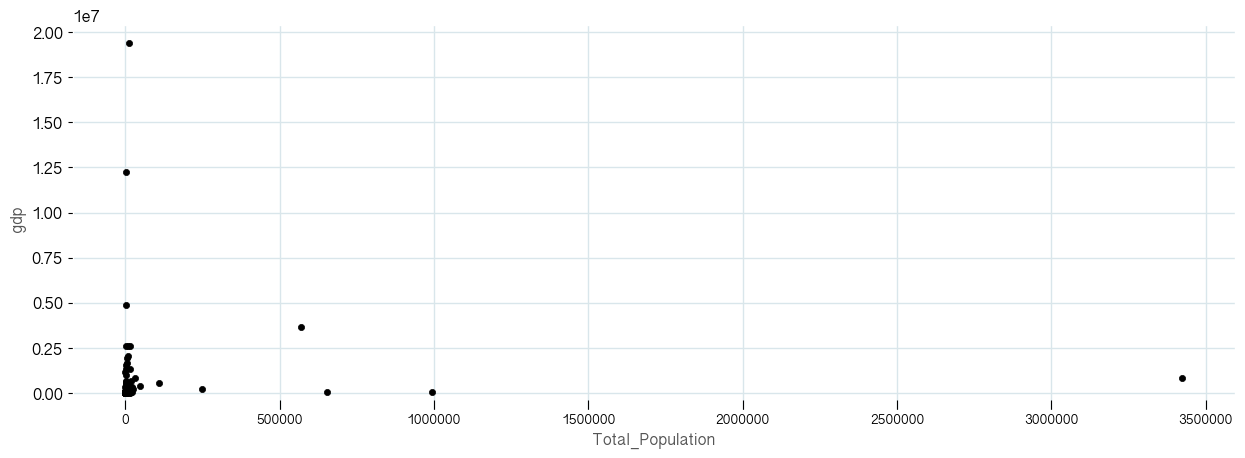

In [77]:
gdp_merge.plot(kind='scatter', x='Total_Population', y='gdp', figsize=(15,5))

In [54]:
# top_twenty = df2.sort_values(by='gdp', ascending=False).head(20)
GDPtop_ten = df2.sort_values(by='gdp', ascending=False).head(10)
topten_list = GDPtop_ten.country
topten_list[0]

'United States'

In [60]:
# ax = top_twenty.plot(kind='barh', x='country', y='gdp')
# my_counties = ['Bexar County, TX', 'Dallas County, TX', 'Tarrant County, TX']
# TXco_df = TXeco_df[TXeco_df['Name'].isin(my_counties)]
# TXco_df
gdp_ref_df = last_year[last_year['Host_Country'].isin(topten_list)]
gdp_ref_df

,Year,Host_Country,Origin,Refugees,Asylum-seekers,Returned refugees,Internally_Displaced_Persons_(IDPs),Returned_IDPs,Stateless persons,Others_of_concern,Total_Population
688,2017,Brazil,Syrian Arab Rep.,2905.0,4522.0,NaN,NaN,NaN,NaN,NaN,7427.0
689,2017,Canada,Syrian Arab Rep.,3095.0,806.0,NaN,NaN,NaN,NaN,NaN,3901.0
692,2017,China,Syrian Arab Rep.,42.0,32.0,NaN,NaN,NaN,NaN,NaN,74.0
704,2017,Germany,Syrian Arab Rep.,496674.0,70833.0,NaN,NaN,NaN,NaN,NaN,567507.0
715,2017,France,Syrian Arab Rep.,12520.0,2394.0,NaN,NaN,NaN,NaN,NaN,14914.0
717,2017,United Kingdom,Syrian Arab Rep.,9100.0,574.0,NaN,NaN,NaN,NaN,NaN,9674.0
727,2017,India,Syrian Arab Rep.,87.0,17.0,NaN,NaN,NaN,NaN,NaN,104.0
732,2017,Italy,Syrian Arab Rep.,3618.0,1696.0,NaN,NaN,NaN,NaN,NaN,5314.0
735,2017,Japan,Syrian Arab Rep.,66.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0
800,2017,United States,Syrian Arab Rep.,7282.0,3358.0,NaN,NaN,NaN,NaN,NaN,10640.0


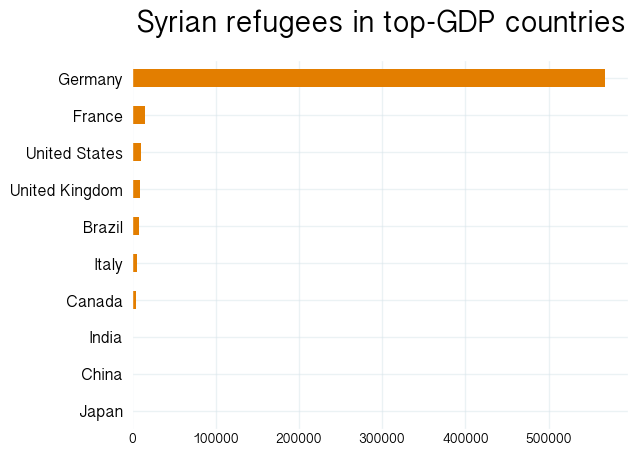

In [69]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][2]
ax = gdp_ref_df.sort_values(by='Total_Population', ascending=True).plot(kind='barh', x='Host_Country', y='Total_Population', color=color)

ax.set_title("Syrian refugees in top-GDP countries", fontweight='bold', pad=20)
ax.title.set_fontsize(22)
ax.title.set_fontname("Khmer Sangam MN")

ax.legend_.remove()
ax.yaxis.label.set_visible(False)
ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

In [ ]:
# wall_punchers = df[df.Narrative_1.str.contains("PUNCH.*WALL", na=False)]
# wall_punchers['Sex'].value_counts().sort_values(ascending=True).plot(kind="barh")